In [21]:
import numpy as np
import matplotlib.pyplot as plt
import ex4
from importlib import reload
reload(ex4);
from scipy.signal import lfilter

In [5]:
ks = ex4.kalman_simple(a22=0.98,q22=1,R=100,S0=15)
ks.simulate()


Text(60, -200, 'r.m.s.e.=108.52')

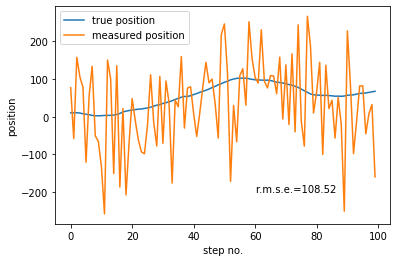

In [18]:
ax = plt.subplot(1,1,1)
plt.plot(ks.x[0,:])
plt.plot(ks.y)
ax.legend(['true position', 'measured position'])
ax.set_xlabel('step no.')
ax.set_ylabel('position');
rms = "r.m.s.e.={:.2f}".format(np.sqrt(np.mean((ks.y-ks.x[0,:])**2)))
ax.text(60,-200,rms)

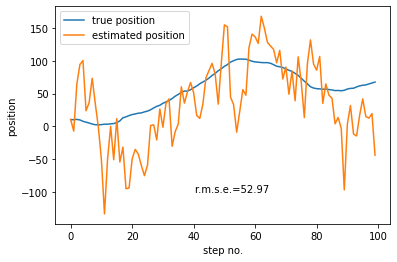

In [19]:
ks.kalman_filter()
ax = plt.subplot(1,1,1)
plt.plot(ks.x[0,:])
plt.plot(ks.x_hat[0,:])

rms = "r.m.s.e.={:.2f}".format(np.sqrt(np.mean((ks.x_hat[0,:]-ks.x[0,:])**2)))

ax.legend(['true position', 'estimated position'])
ax.set_xlabel('step no.')
ax.set_ylabel('position');
ax.text(40,-100,rms);

### comment on the relation between the rmse of $y$ and $\hat{x}$  
The rmse (root mean squared error) of the smoothed (posteriori) measurement is roughly half the raw measurement errors.

$K_t$ is used as a multiplier of $(y_t-CX_{t|t-1})$, the latter quantity can be regarded as the "innovation" or the amount by which the new measurement deviates from the measurement's expected value. Since $y_t$ is noisy, $K_t$ reduces its effect ($0 \lt K_t \lt 1$). $K_t$ in turn is decided by a ratio involving our developing estimate of location error and the measurement error.

The effectiveness of the Kalman filter depends on good knowledge of the system's dynamics: the evolution of the particle's state as well as the measurement errors. If our information about these is incomplete, then Kalman estimates may be biased. When the measurement has high uncorrelated noise levels, such as the above example, even a rough smoother will do a good job: 
 

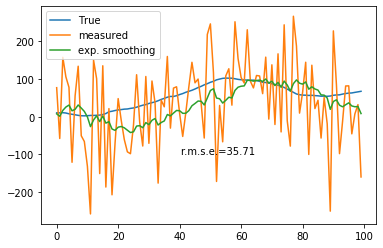

In [27]:
x_smooth = lfilter([0.1],[1., -0.9],ks.y)
ax = plt.subplot(1,1,1)
plt.plot(ks.x[0,:])
plt.plot(ks.y)
plt.plot(x_smooth)
plt.legend(['True','measured','exp. smoothing'])
rms = "r.m.s.e.={:.2f}".format(np.sqrt(np.mean((x_smooth-ks.x[0,:])**2)))
ax.text(40,-100,rms);